In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../Dataset/Twitch_global_data.csv")
df.sample(3)

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,Viewer_ratio
21,2017,10,585177534,787587,1835725,8479007,25723,15847,26.63
44,2019,9,878083331,1221256,2817054,13284517,46242,19869,26.35
65,2021,6,1963630266,2731057,5775498,20285356,101892,36099,27.38


In [3]:
# Supongamos que tu DataFrame se llama df
df["Quarter"] = ((df["Month"] - 1) // 3) + 1   # trimestre 1–4

# Crear una columna tipo string con el formato "YYYY-QX"
df["Year_Q"] = df["year"].astype(str) + "-Q" + df["Quarter"].astype(str)

# Ahora poner esa columna como índice
df = df.set_index("Year_Q")

In [4]:
df.drop(columns=["year", "Month"], inplace=True)

<Axes: xlabel='Year_Q'>

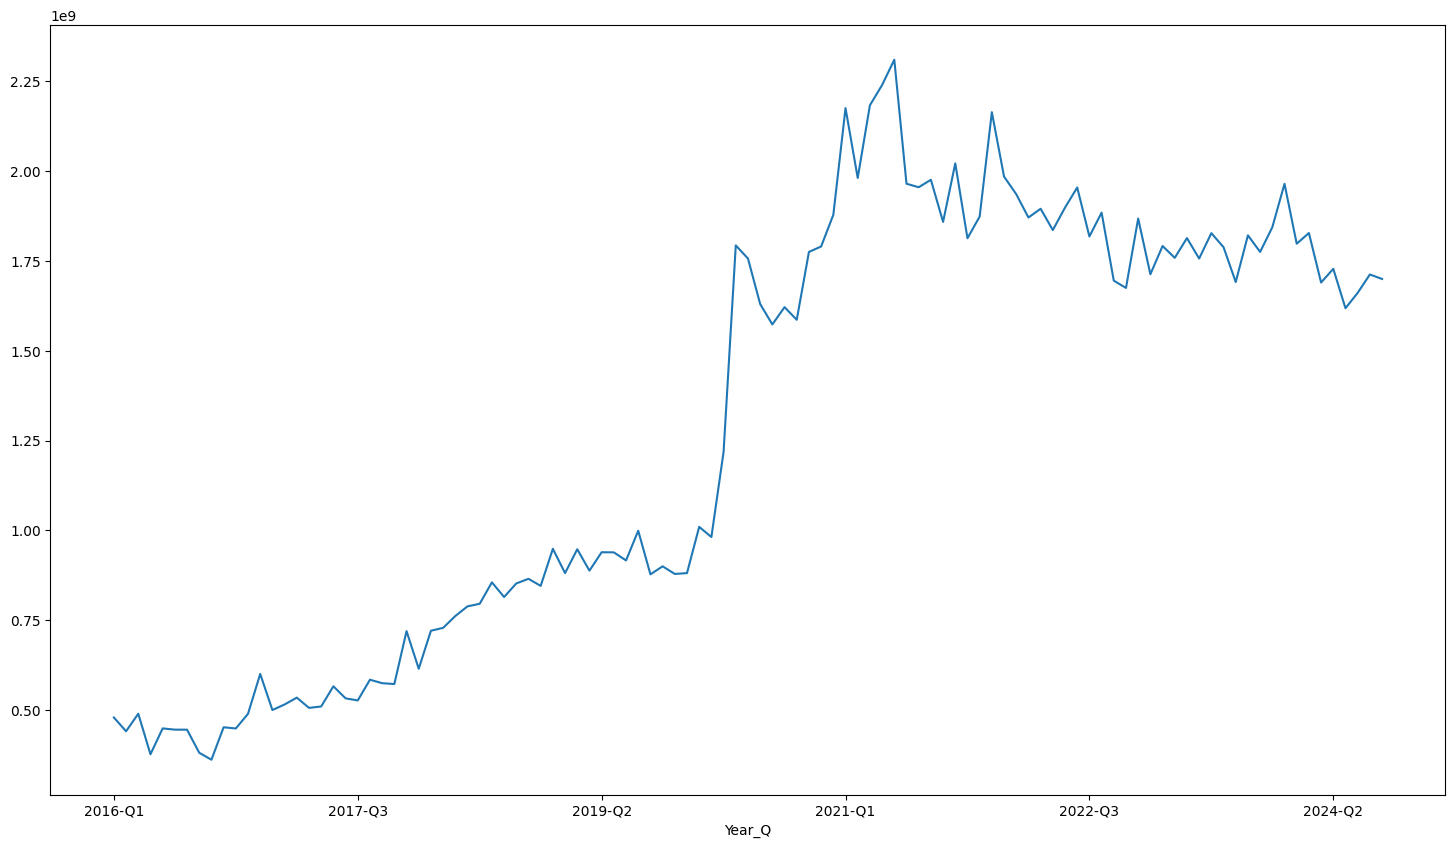

In [5]:
df.Hours_watched.plot(figsize=(18, 10))

In [7]:
df.drop(columns=["Quarter", "Viewer_ratio", "Games_streamed", "Avg_channels", "Streams", "Peak_viewers", "Avg_viewers"], inplace=True)

In [13]:
resultado = df.groupby("Year_Q")["Hours_watched"].sum()

In [14]:
resultado.to_csv("../Dataset/datos_limpios.csv")

<Axes: xlabel='Year_Q'>

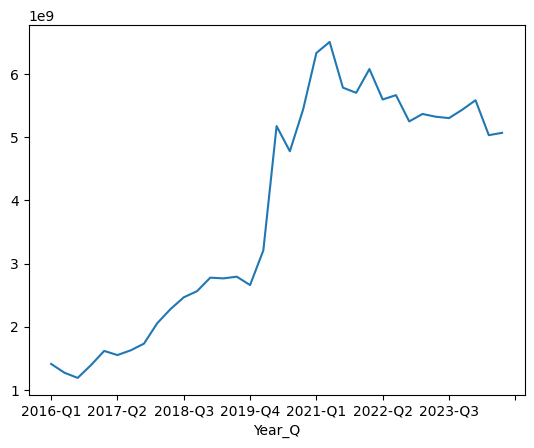

In [15]:
resultado.plot()